# Time Series Analysis: Tutorial 2

## Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('text', usetex=True)
import pandas as pd
import statsmodels.api as sm

## Data

In [3]:
#Load the Stata-file into a dataframe. It is a data file with US population values from 1790 to 1990
#in 10-year steps.
series=pd.read_stata('/home/nudse/Dokumente/Uni/Arbeit TU Berlin/TSA WS 2021/Tutorials/Tutorial 1/USpop.dta')
series=series.drop([21,22])
series_relativechange=100*series.pct_change()
time = pd.date_range(start="1790", end="2000", closed=None, freq="10Y")
data = pd.DataFrame(time, columns=['date'])
ts=data.assign(pop=series.values,pop_relative=series_relativechange.values)

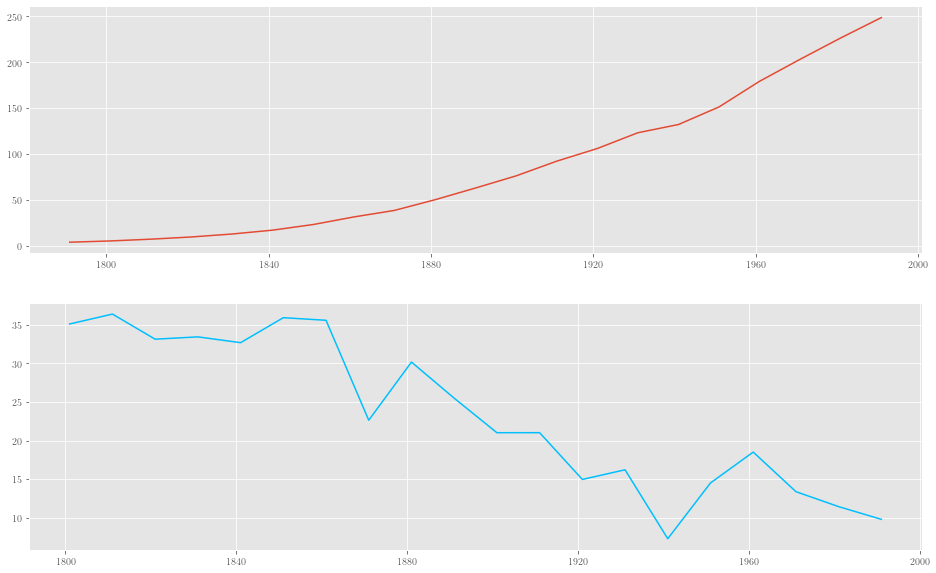

In [4]:
#Plot both series with matplotlib.
fig, ax=plt.subplots(2,1,figsize=(16,10))
ax[0].plot(ts['date'],ts['pop'])
ax[1].plot(ts['date'],ts['pop_relative'],c="deepskyblue")

## Simple deterministic trend models

Which deterministic trend model seems appropiate to model the pattern of the curve?

## Linear trend model

In [5]:
#Estimate the linear trend. You can use the linear regression command 'sm.OLS(dep,indep)' from statsmodels.
y=ts['pop']
#You can either just regress on the periods t_1, t_2, t_3, ... or you regress on the actual years 
#1790, 1800, 1810, ...
t_periods=[i for i in range(1,22)]
t_years=[1790+i*10 for i in range(21)]
X=sm.add_constant(t_years)
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           5.65e-12
Time:                        14:03:27   Log-Likelihood:                -94.147
No. Observations:                  21   AIC:                             192.3
Df Residuals:                      19   BIC:                             194.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2211.3376    153.450    -14.411      0.0

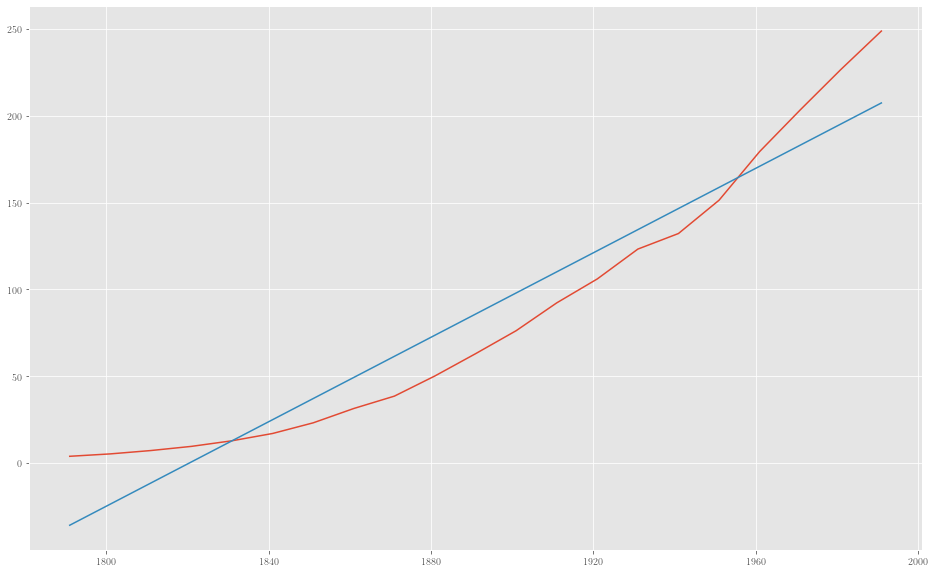

In [6]:
#Use the estimated model to predict the US population. Plot the prediction into the original plot. Does the model
#seem appropriate?
prediction=result.predict(X)
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'])
plt.plot(ts['date'],prediction)

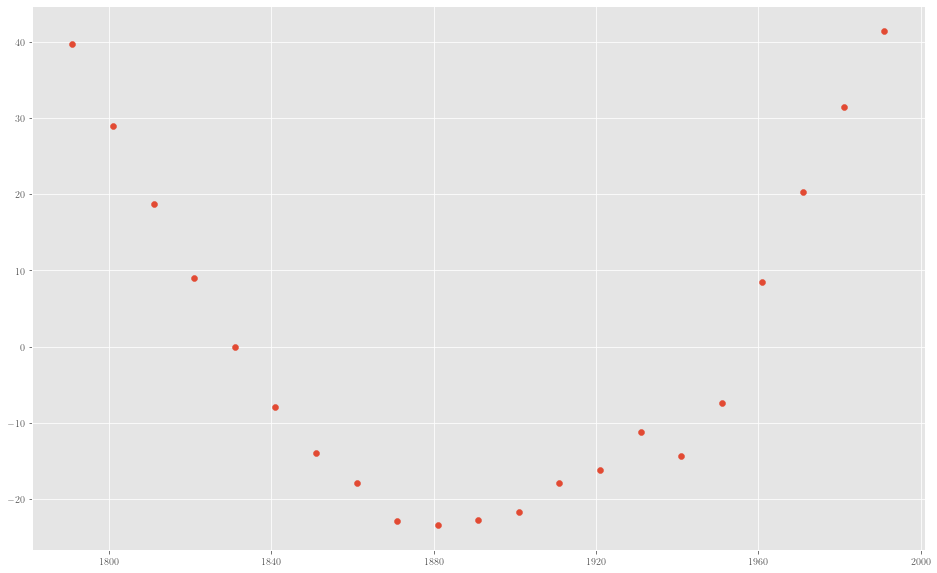

In [7]:
#Check the residuals to further adress the question of appropriateness of the linear trend model. What should they
#behave like? What can you conclude?
fig, ax=plt.subplots(figsize=(16,10))
plt.scatter(ts['date'],result.resid)

## Linear trend model with log-data

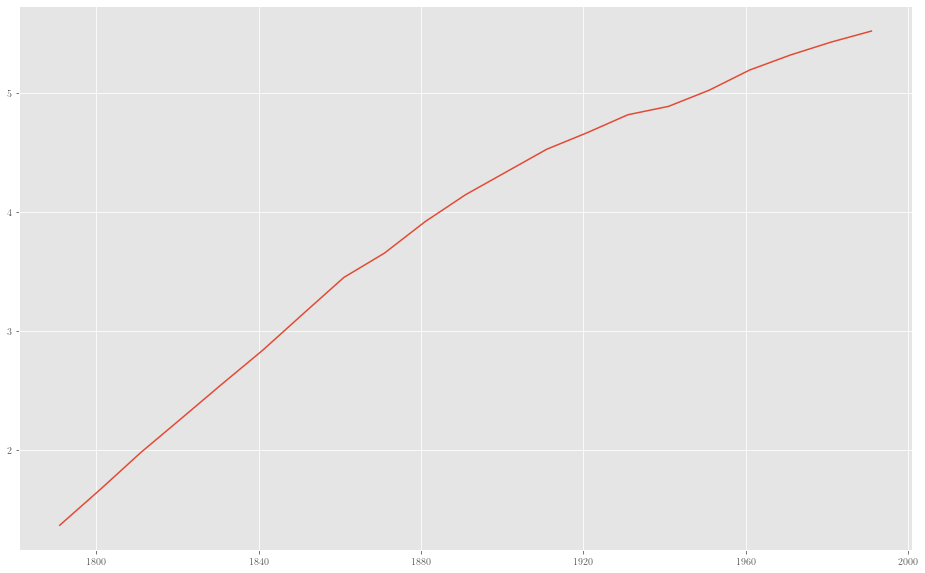

In [8]:
#Reproduce the linear trend model for log-data.
ts['log_pop'] = np.log(ts['pop'])
fig, ax=plt.subplots(figsize=(16,10))
#plt.plot(ts['date'],ts['pop'])
plt.plot(ts['date'],ts['log_pop'])

In [9]:
#Estimate the model via OLS.
y_log=ts['log_pop']
X=sm.add_constant(t_years)
model_log = sm.OLS(y_log,X)
result_log = model_log.fit()
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_pop   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     570.4
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.24e-15
Time:                        14:03:33   Log-Likelihood:                 1.1079
No. Observations:                  21   AIC:                             1.784
Df Residuals:                      19   BIC:                             3.873
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.4125      1.644    -21.534      0.0

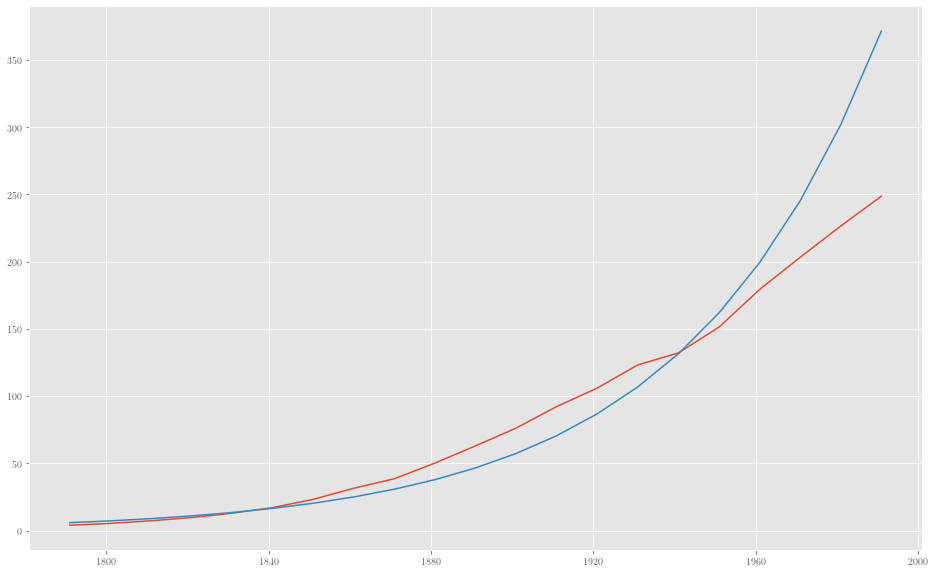

In [10]:
#Plot the prediction against the observed data. Note that the model makes log-predictions, i.e. you should
#compute the exponentials of the predictions in order to make a comparison to the original population data.
prediction_log=np.exp(result_log.predict(X))
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'])
plt.plot(ts['date'],prediction_log)

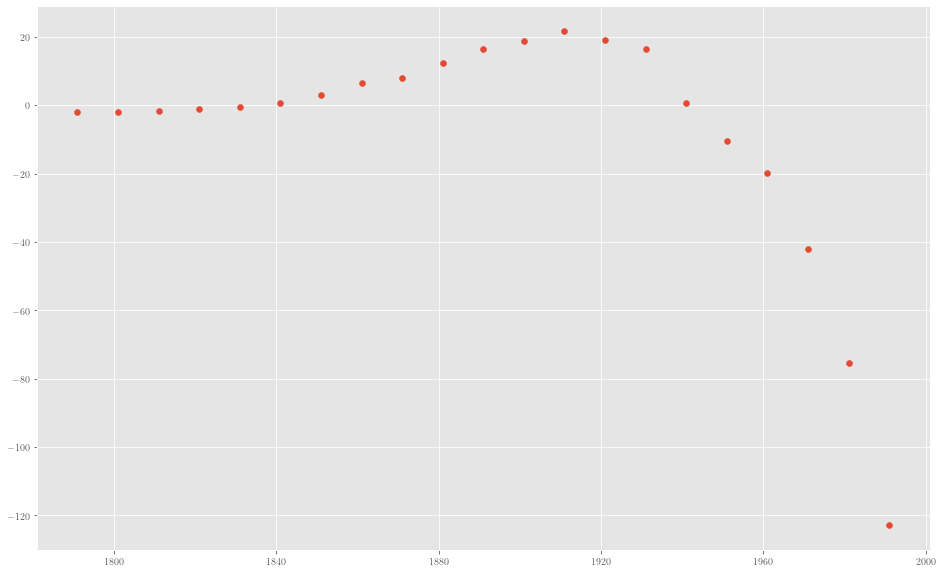

In [11]:
#Check the residuals for the log. Now again you have to compute the residuals of the above graph, i.e. you cannot
#use the residuals of the log-model.
#What do you conclude? Do the residuals behave appropriately?
residuals=ts['pop']-prediction_log
fig, ax=plt.subplots(figsize=(16,10))
plt.scatter(ts['date'],residuals)

In [12]:
ts

,date,pop,pop_relative,log_pop
0,1790-12-31,3.929214,NaN,1.368439
1,1800-12-31,5.308483,35.102924,1.669306
2,1810-12-31,7.239881,36.383238,1.979605
3,1820-12-31,9.638453,33.129992,2.265761
4,1830-12-31,12.860702,33.431184,2.554176
5,1840-12-31,17.063353,32.678239,2.836933
6,1850-12-31,23.191876,35.916288,3.143802
7,1860-12-31,31.443321,35.579032,3.448187
8,1870-12-31,38.558371,22.628176,3.652173
9,1880-12-31,50.189209,30.164236,3.915800


In [15]:
#The plot of the residuals of the log-model suggests, that splitting the data into 2 sequences could
#be sensible. Split the series into 2 appropriate periods and fit linear log-models for each. I chose the periods
#1790-1910 and 1910-1990.
y_log_part1=y_log[:13]
y_log_part2=y_log[12:]
X1=sm.add_constant(t_years[:13])
X2=sm.add_constant(t_years[12:])

#Estimate model for the time until 1920
model_log_part1 = sm.OLS(y_log_part1,X1)
result_log_part1 = model_log_part1.fit()

#Estimate model for the time after 1920
model_log_part2 = sm.OLS(y_log_part2,X2)
result_log_part2 = model_log_part2.fit()

print(result_log_part1.summary())
print(result_log_part2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_pop   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2207.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           4.98e-14
Time:                        14:05:12   Log-Likelihood:                 16.008
No. Observations:                  13   AIC:                            -28.02
Df Residuals:                      11   BIC:                            -26.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -46.4042      1.053    -44.062      0.0

/home/nudse/stats/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/nudse/stats/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


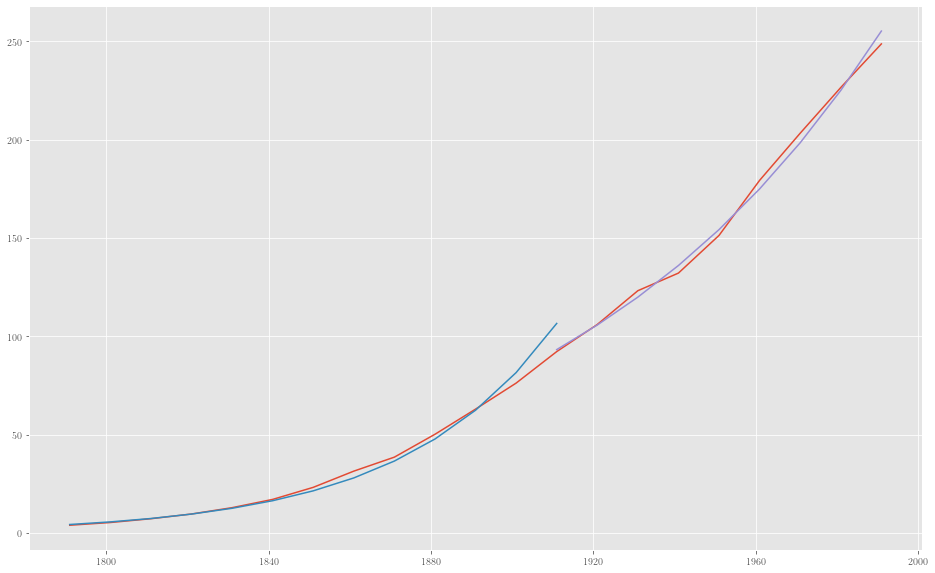

In [16]:
#Plot the predictions against the observed data.
prediction_log_part1=np.exp(result_log_part1.predict(X1))
prediction_log_part2=np.exp(result_log_part2.predict(X2))
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'])
plt.plot(ts['date'].values[:13],prediction_log_part1)
plt.plot(ts['date'].values[12:],prediction_log_part2)

$\textbf{EXERCISE:}$ Seperate at time t=1920 and t=1900 or other seemingly appropriate points in time and rerun the procedure. Check the residuals to decide which separation works best.

## Quadratic trend model

In [17]:
#Fit a quadratic trend model to the data. You can recycle all the code above.

#Generate the data matrix.
t_years=[1790+i*10 for i in range(21)]
t_years_2=[(1790+i*10)**2 for i in range(21)]
X=np.array([t_years,t_years_2])
X=X.transpose()

#Fit the model.
X_2=sm.add_constant(X)
model_2 = sm.OLS(ts['pop'],X_2)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8050.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.70e-27
Time:                        14:05:33   Log-Likelihood:                -49.550
No. Observations:                  21   AIC:                             105.1
Df Residuals:                      18   BIC:                             108.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.101e+04    659.433     31.855      0.0

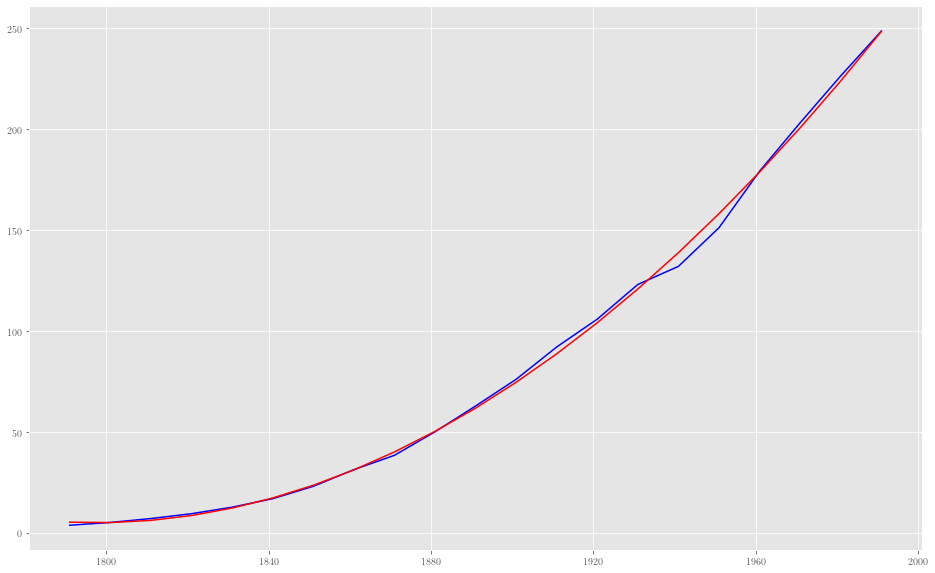

In [18]:
#Plot the prediction against the observed data.
prediction_2=result_2.predict(X_2)
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'],c='blue')
plt.plot(ts['date'],prediction_2,c='red')

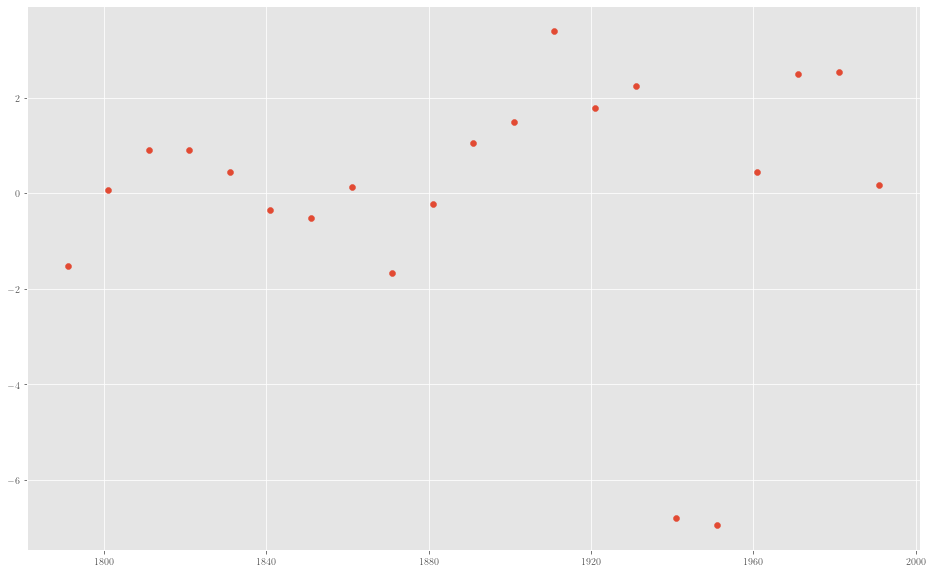

In [19]:
#Check the residuals. What's your conclusion?
fig, ax=plt.subplots(figsize=(16,10))
plt.scatter(ts['date'],result_2.resid)

## Cubic trend model

In [20]:
#Fit a quadratic trend model to the data. You can recycle all the code above.

#Generate the data matrix.
t_years=[1790+i*10 for i in range(21)]
t_years_2=[(1790+i*10)**2 for i in range(21)]
t_years_3=[(1790+i*10)**3 for i in range(21)]
X=np.array([t_years,t_years_2,t_years_3])
X=X.transpose()

#Fit the model.
X_3=sm.add_constant(X)
model_3 = sm.OLS(ts['pop'],X_3)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5320.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.84e-25
Time:                        14:05:39   Log-Likelihood:                -49.042
No. Observations:                  21   AIC:                             106.1
Df Residuals:                      17   BIC:                             110.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -770.0663   2.37e+04     -0.032      0.9

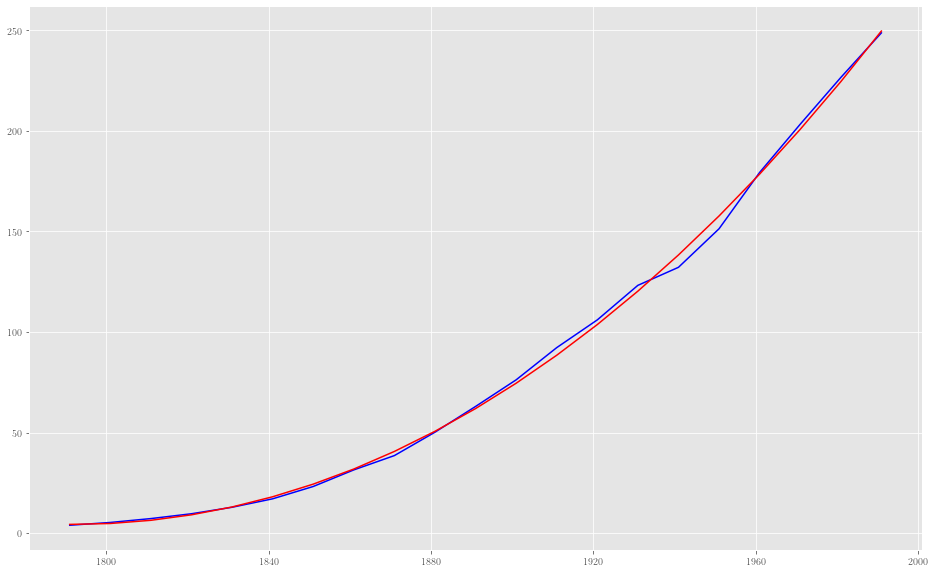

In [21]:
#Plot the prediction against the observed data.
prediction_3=result_3.predict(X_3)
fig, ax=plt.subplots(figsize=(16,10))
plt.plot(ts['date'],ts['pop'],c='blue')
plt.plot(ts['date'],prediction_3,c='red')

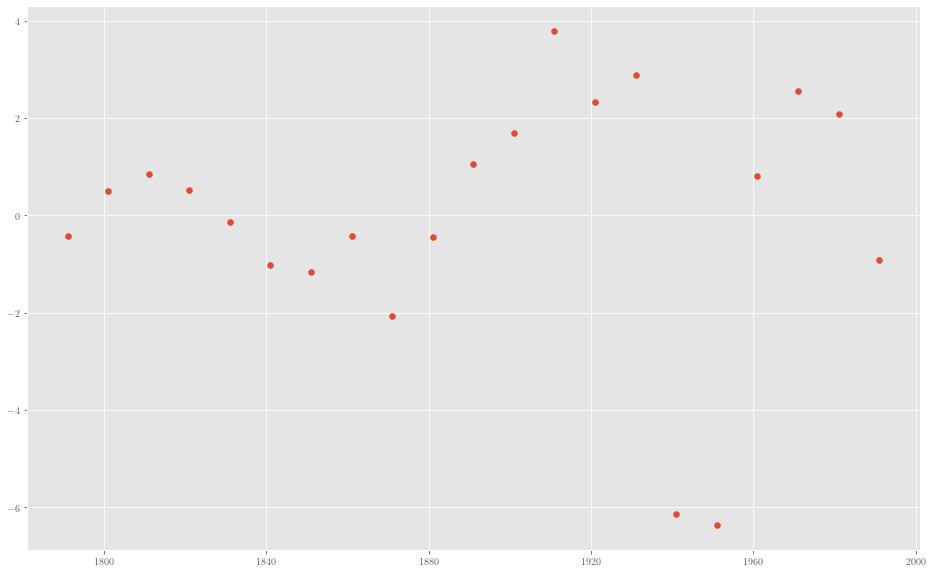

In [22]:
#Check the residuals. What's your conclusion?
fig, ax=plt.subplots(figsize=(16,10))
plt.scatter(ts['date'],result_3.resid)

## Model comparison and forecast

Can you identify a model candidate which your prefer over the others? Why? What could you do to further investigate?

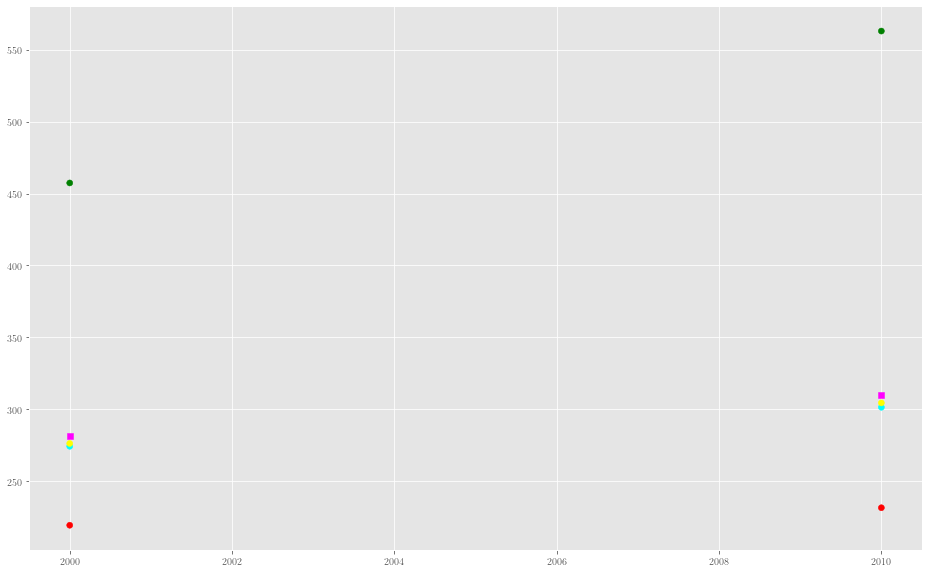

In [23]:
#Calculate forecasts for the year 2000 and 2010 and compare them with the true US popolution
#in 2000 (281.55 Mio.) and 2010 (310.3 Mio.).

#Linear trend
prediction_linear_2000=result.predict([1,2000])
prediction_linear_2010=result.predict([1,2010])

#Linear trend with log-data
prediction_log_2000=np.exp(result_log.predict([1,2000]))
prediction_log_2010=np.exp(result_log.predict([1,2010]))

#Quadratic trend
prediction_2_2000=result_2.predict([1,2000,2000**2])
prediction_2_2010=result_2.predict([1,2010,2010**2])

#Cubic trend
prediction_3_2000=result_3.predict([1,2000,2000**2,2000**3])
prediction_3_2010=result_3.predict([1,2010,2010**2,2010**3])

#Plot the predictions
forecasts=[prediction_linear_2000,prediction_log_2000,prediction_2_2000,prediction_3_2000,prediction_linear_2010,prediction_log_2010,prediction_2_2010,prediction_3_2010]
forecasts
fig, ax=plt.subplots(figsize=(16,10))
plt.scatter([2000,2000,2000,2000,2010,2010,2010,2010],forecasts,c=['red','green','cyan','yellow','red','green','cyan','yellow'])
plt.scatter([2000,2010],[281.55,310.3],c=['magenta','magenta'],marker='s')